In [313]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [314]:
Dataset = pd.read_csv("googleplaystore.csv")
Dataset.head() # ilk olaarak verilerin bi kısmını alır datasete bi bkaraız.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [315]:
# mesela installs'taki + kısımlarından kurtulacağız ve veri tiplerini belirleyeceğiz bunun sebebi veri analizi için kullanılan kütüphaneler veri tipine göre işlem yapar. 

In [316]:
Dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [317]:
# mesela burada bazı kolonların isimleri arasında boşluk var örnek olarak Content Rating
Dataset.columns = Dataset.columns.str.replace(" ","_") # burada kolonların isimlerinde değişim yaptık Pandas vs üzerinde string işlemi yapmak için df.str.fonk() mantığını kullanmak lazım.
Dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [318]:
Dataset.shape # kaç satır kaç sutun var görebiliriz.
# veriyi görselleştirmeden önce verilerin veri tipini ayarlamak çok önemlidir.

(10841, 13)

## Eksik verileri ele alma

In [319]:
Dataset.isnull().sum() # buradan hangi kolonda ne kadar boşluk var görebiliriz.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [320]:
sbn.set_theme()
sbn.set(rc = {"figure.dpi":300,"figure.figsize":(12,9)})


<Axes: >

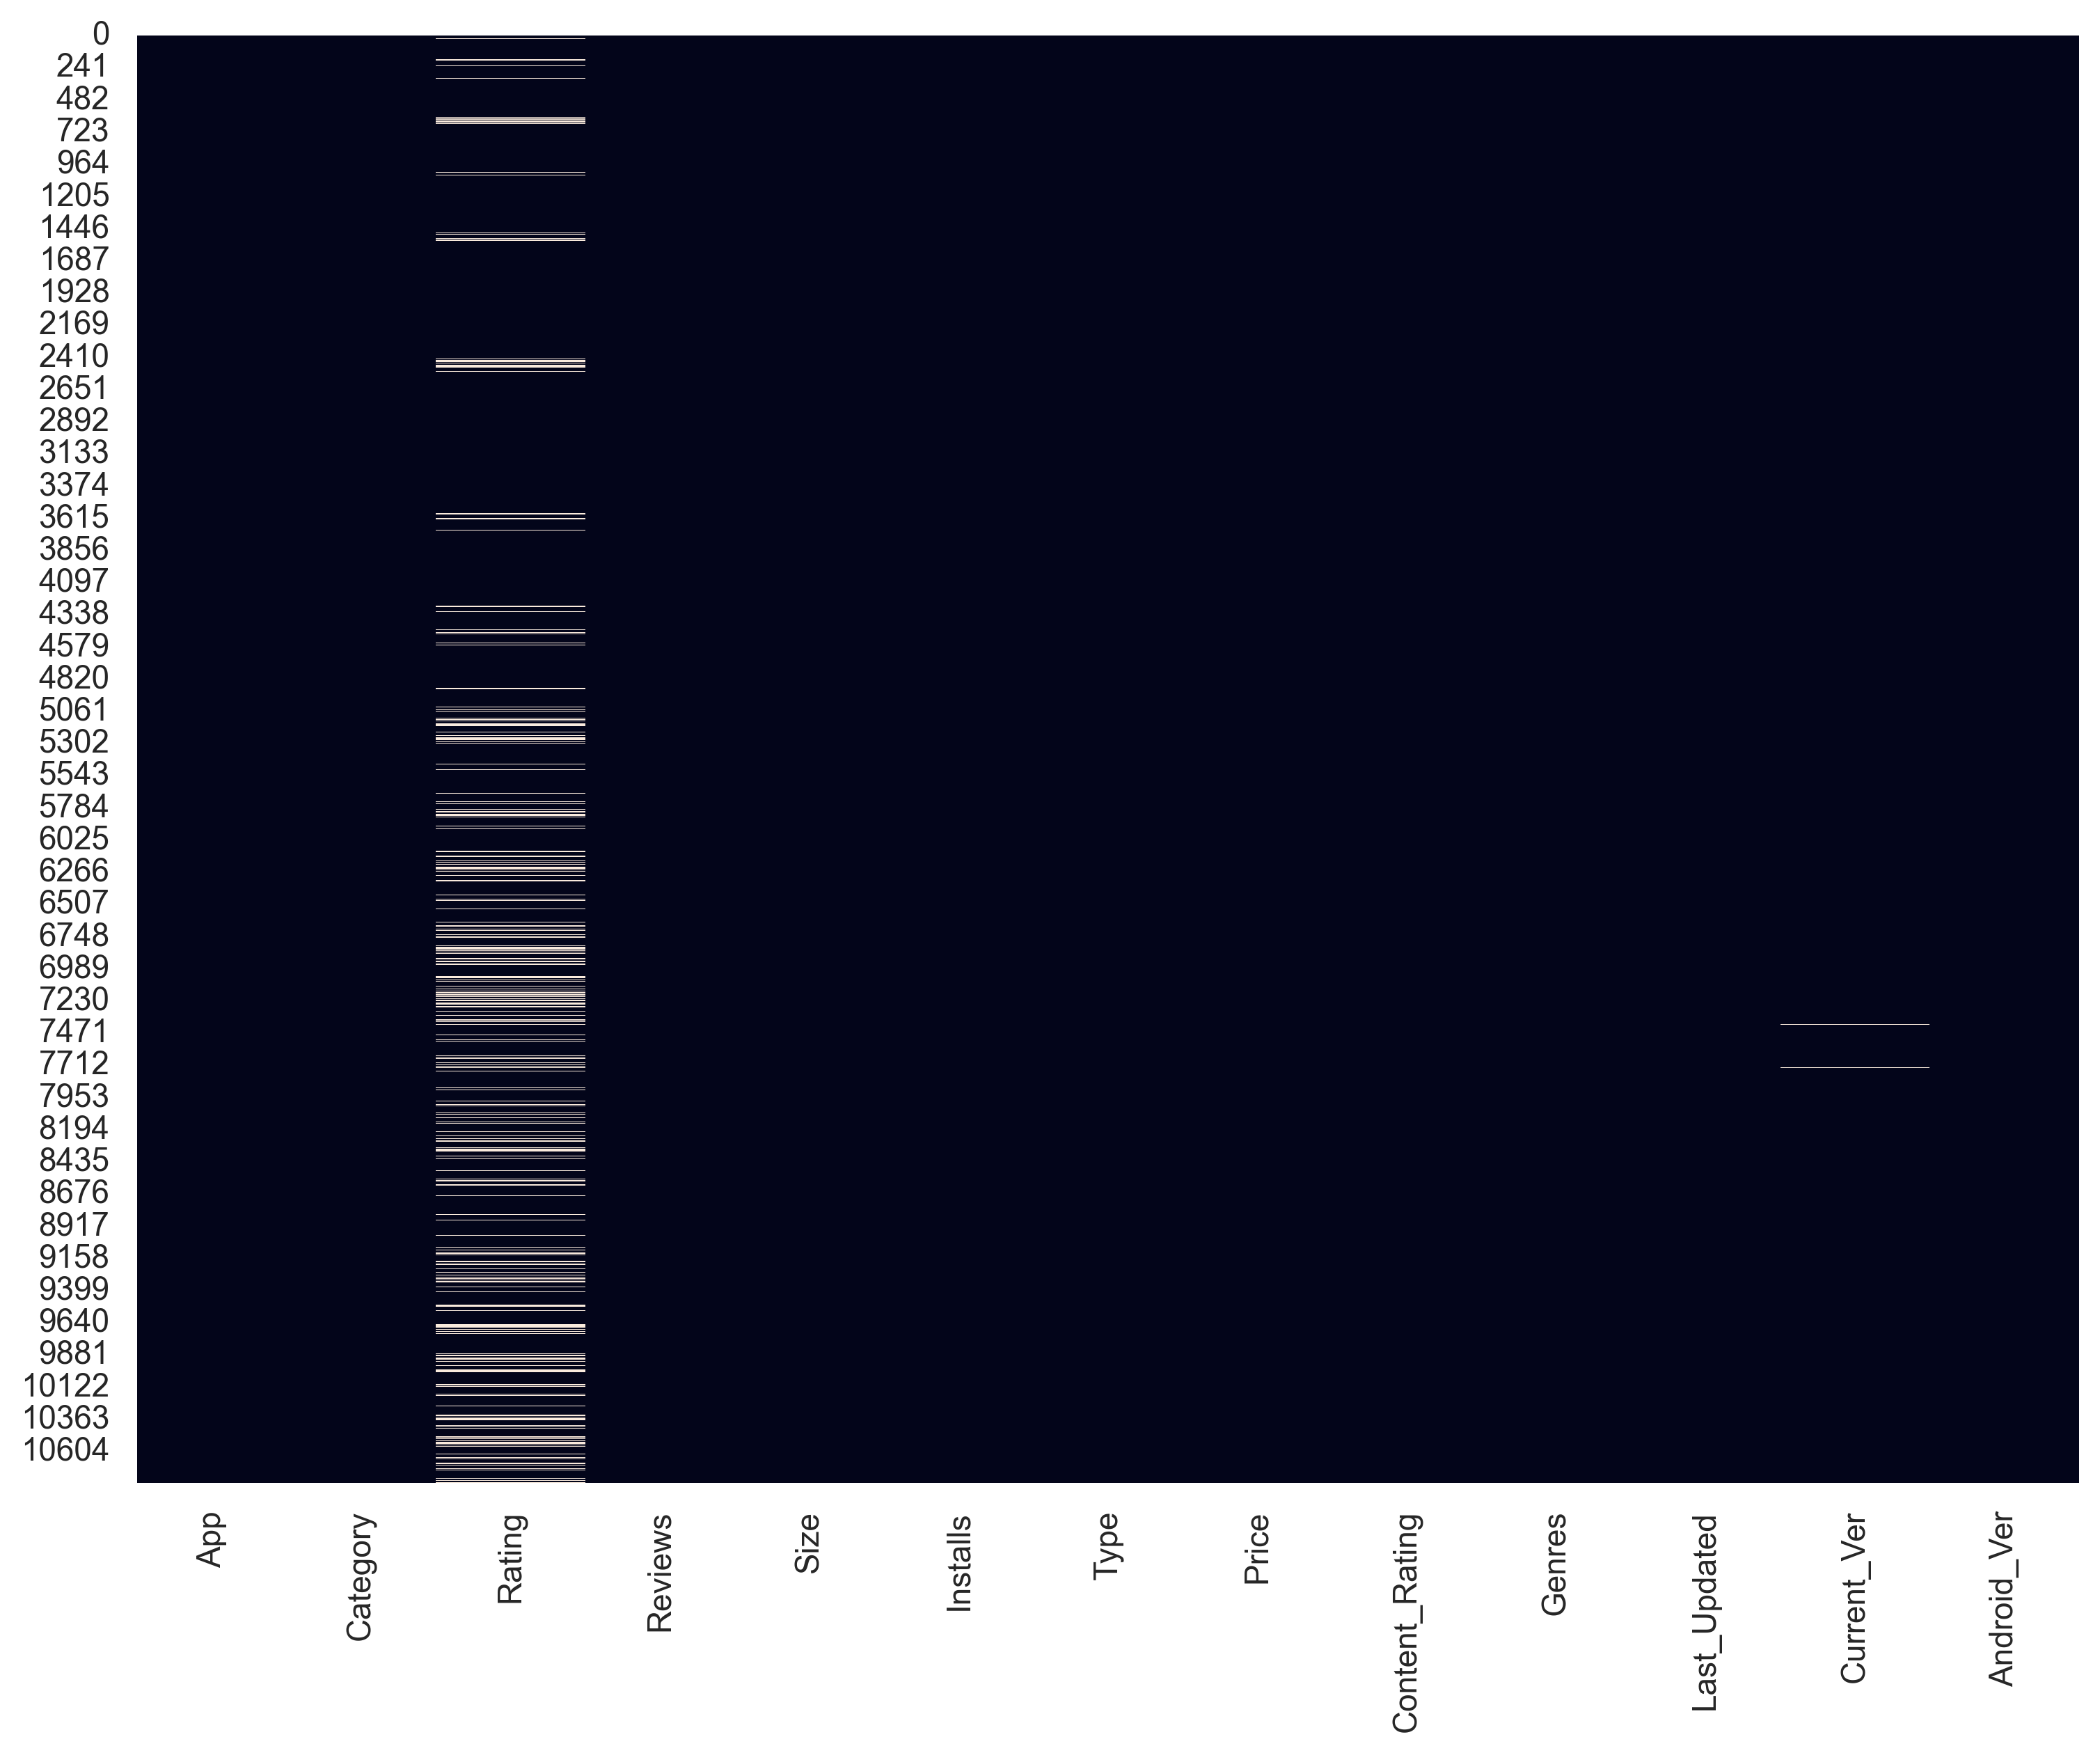

In [321]:
sbn.heatmap(Dataset.isnull(),cbar = False) # eksik verilerin olduğu satırları görebiliriz.
# mesela istersek eksik verilerin olduğu satırı silebiliriz. ama bu veri kaybına yol açar. bu yüzden genek olarak eksik verilerin olduğu yere grubun ortamalası yazılır veya medyanı kullanılır.
# genel olarak medyan kullanılır boş verileri doldurmak için.

In [322]:
rating_median = Dataset["Rating"].median()
Dataset["Rating"].fillna(rating_median,inplace=True)

In [323]:
Dataset.dropna(inplace=True)

In [324]:
Dataset.isnull().sum().sum() # 0 verdi buradan biz hiçbir eksik veri olmadığını gördük.

0

In [325]:
Dataset["Reviews"].describe()  # bu sutunu tam sayıya çevireceğiz

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [326]:
Dataset["Reviews"] = Dataset["Reviews"].astype("int64") # veri tipini değiştirdik...

In [327]:
Dataset["Reviews"].describe().round() 

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [328]:
Dataset["Size"].nunique() # 457 adet farklı veri var.

457

In [329]:
Dataset["Size"] = Dataset["Size"].str.replace("M","")
Dataset["Size"] = Dataset["Size"].str.replace("k","")

In [330]:
Dataset["Size"].unique()


array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [331]:
size_median = Dataset[Dataset["Size"] != 'Varies with device']["Size"].astype(float).median() 
Dataset["Size"].replace('Varies with device',size_median,inplace=True)
# Dataset["Size"] = Dataset.Size  bu şekildede kullanabiliriz.

In [332]:
Dataset.Size = pd.to_numeric(Dataset.Size)
Dataset.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [333]:
Dataset.Size.describe()

count    10829.000000
mean        33.514212
std         90.973495
min          1.000000
25%          6.800000
50%         15.000000
75%         28.000000
max       1020.000000
Name: Size, dtype: float64

In [334]:
Dataset.Installs.unique() # hem + hemde virgülleri vs kaldıracağız.

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [335]:
Dataset.Installs = Dataset.Installs.apply(lambda x:x.replace("+",""))
Dataset.Installs = Dataset.Installs.apply(lambda x:x.replace(",",""))
Dataset.Installs = Dataset.Installs.apply(lambda x:int(x)) #değerleri int hale getirdik.. apply ile fonksiyon bağlarsak tüm veriler bu fonksiyonda işlem görür.

In [336]:
Dataset.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [337]:
Dataset.Price = Dataset.Price.apply(lambda x:x.replace("$",""))
Dataset.Price = Dataset.Price.apply(lambda x:float(x)) # değerleri float yaptık.

In [338]:
len(Dataset.Genres.unique()) # 119 farklı değer varmış

119

In [339]:
Dataset.Genres.head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

In [340]:
Dataset.Genres = Dataset.Genres.str.split(";").str[0]
Dataset.Genres.value_counts()

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

In [341]:
Dataset.Genres.loc["Music & Audio"] = "Music" # 1 tane olan Music & Audio 'ı music hale getirdik.

In [342]:
Dataset["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [343]:
Dataset["Last_Updated"] = pd.to_datetime(Dataset["Last_Updated"])

In [344]:
Dataset.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

## VERİ GÖRSELLEŞTİRME

<Axes: xlabel='Type'>

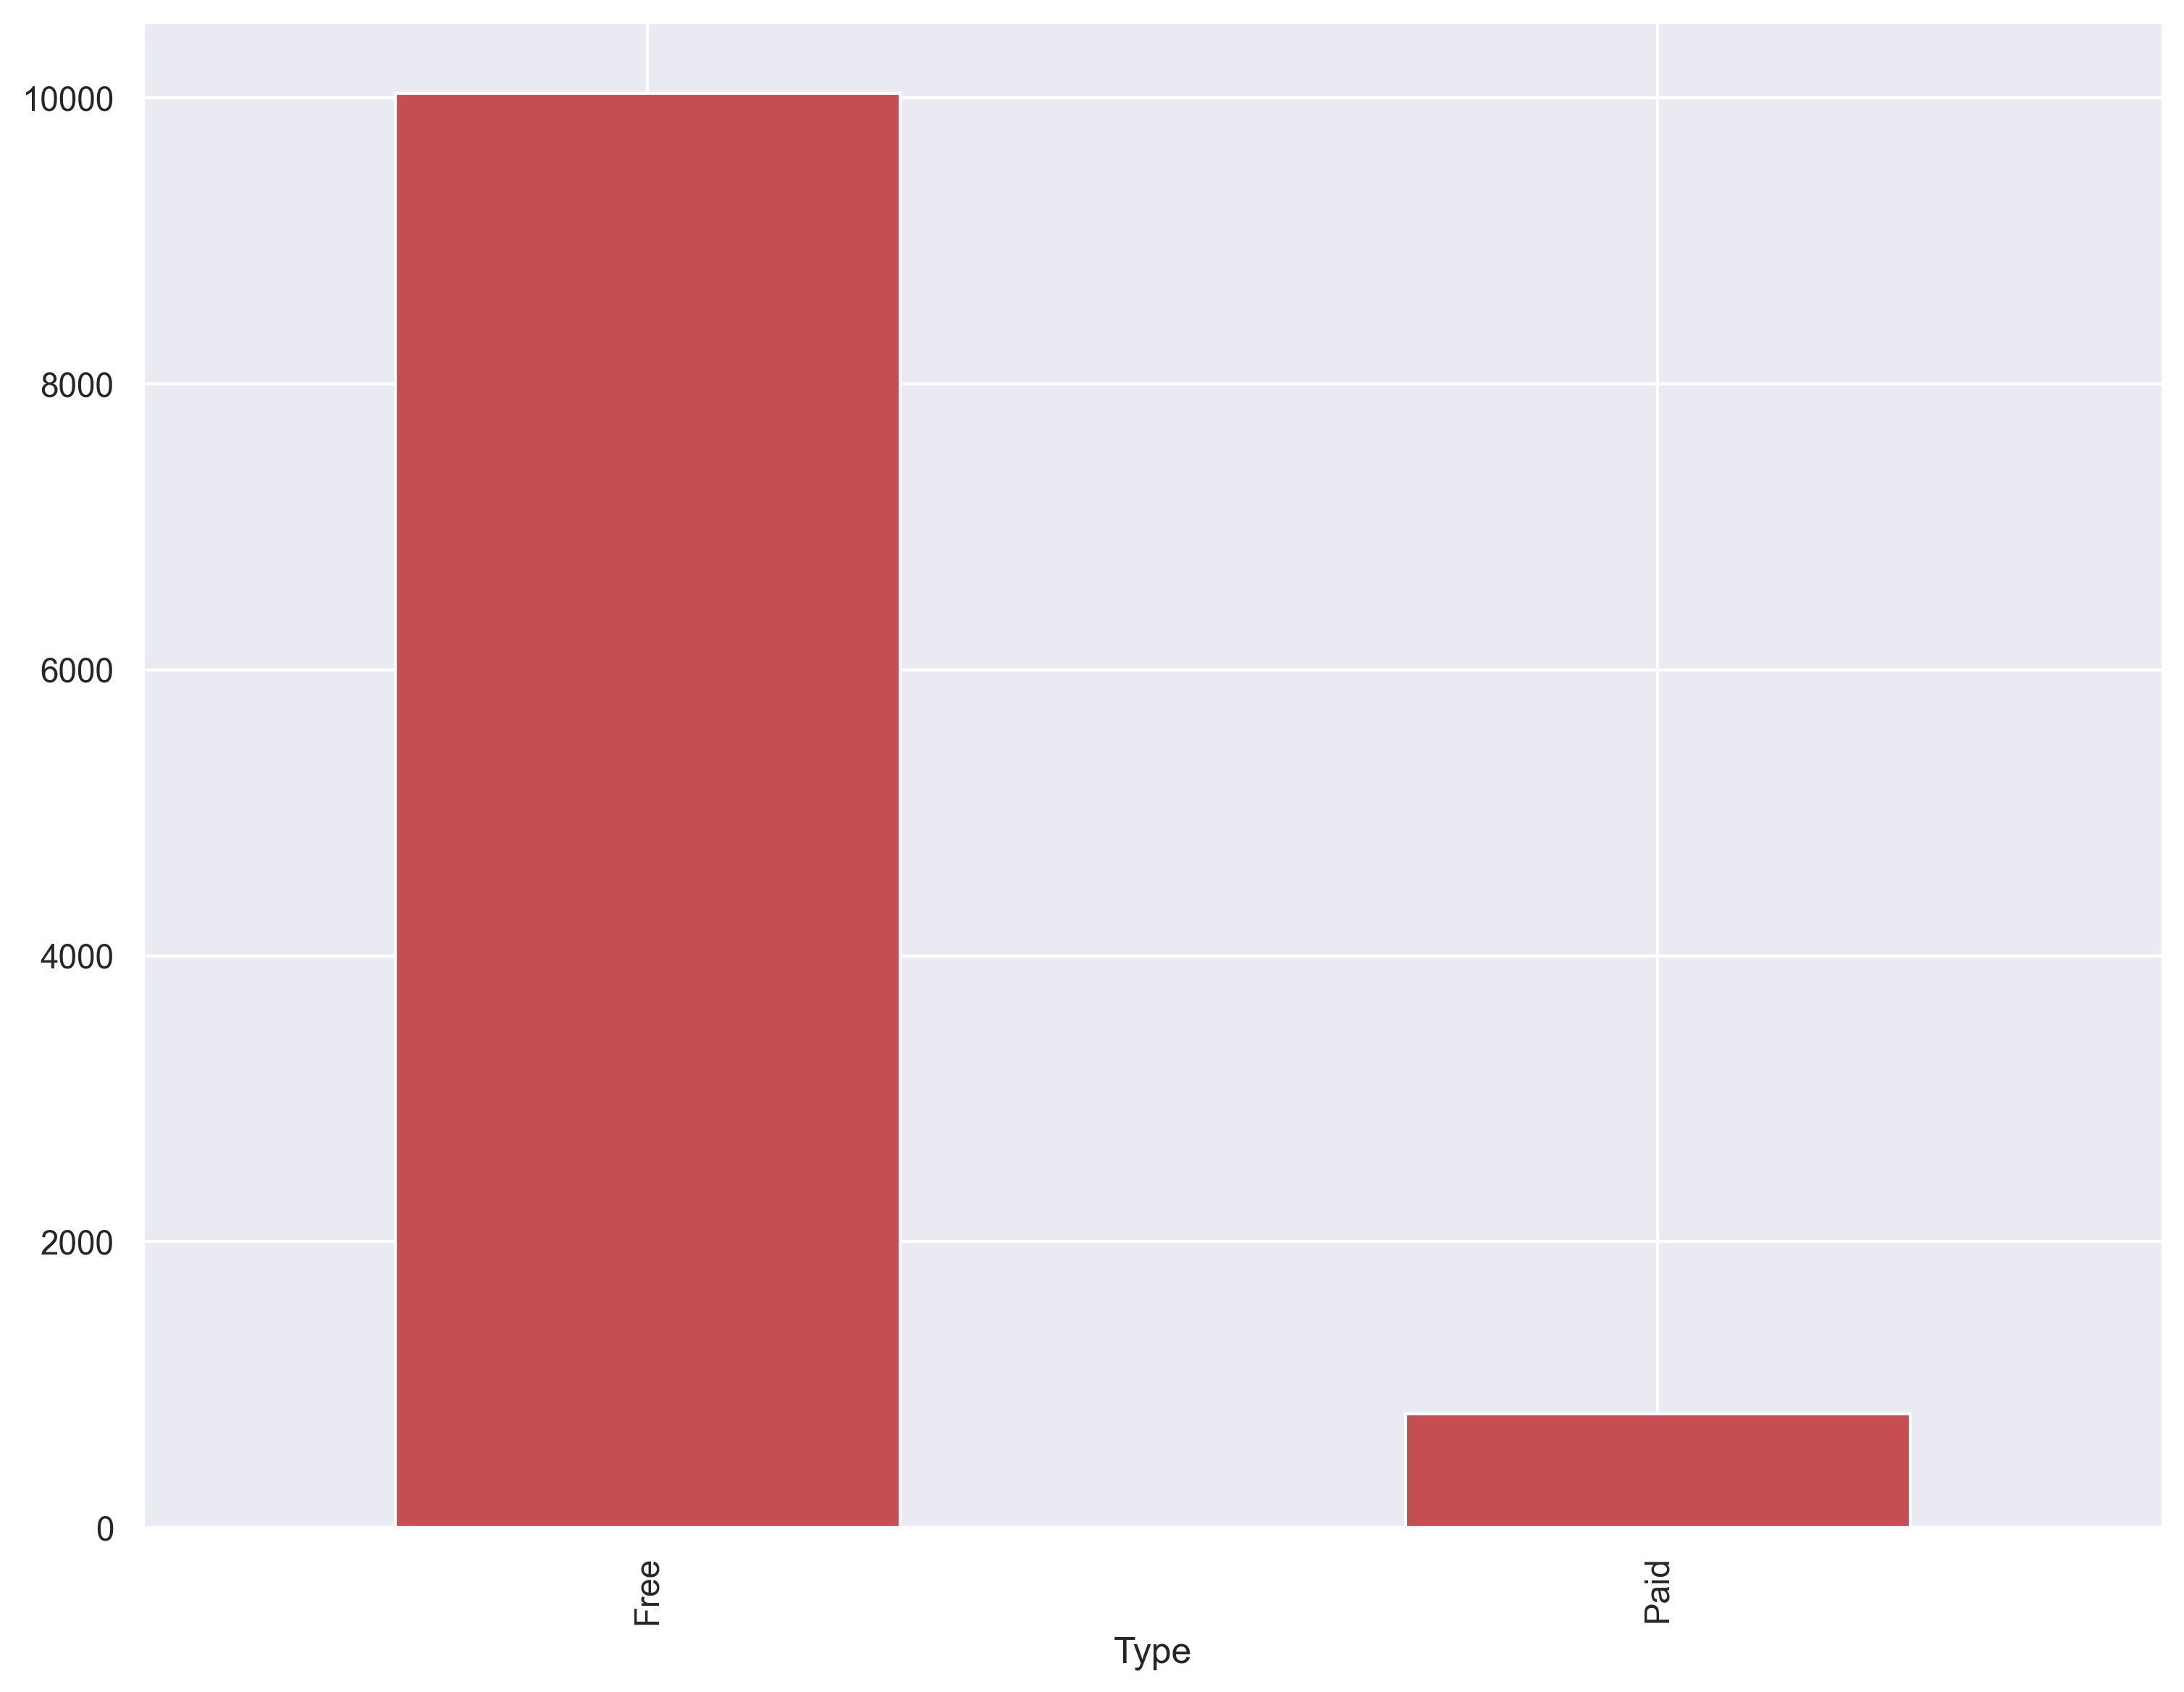

In [345]:
Dataset.Type.value_counts().plot(kind = "bar",color = "r") # ücretsiz uygulamalar daha fazla.

<Axes: xlabel='Type', ylabel='Rating'>

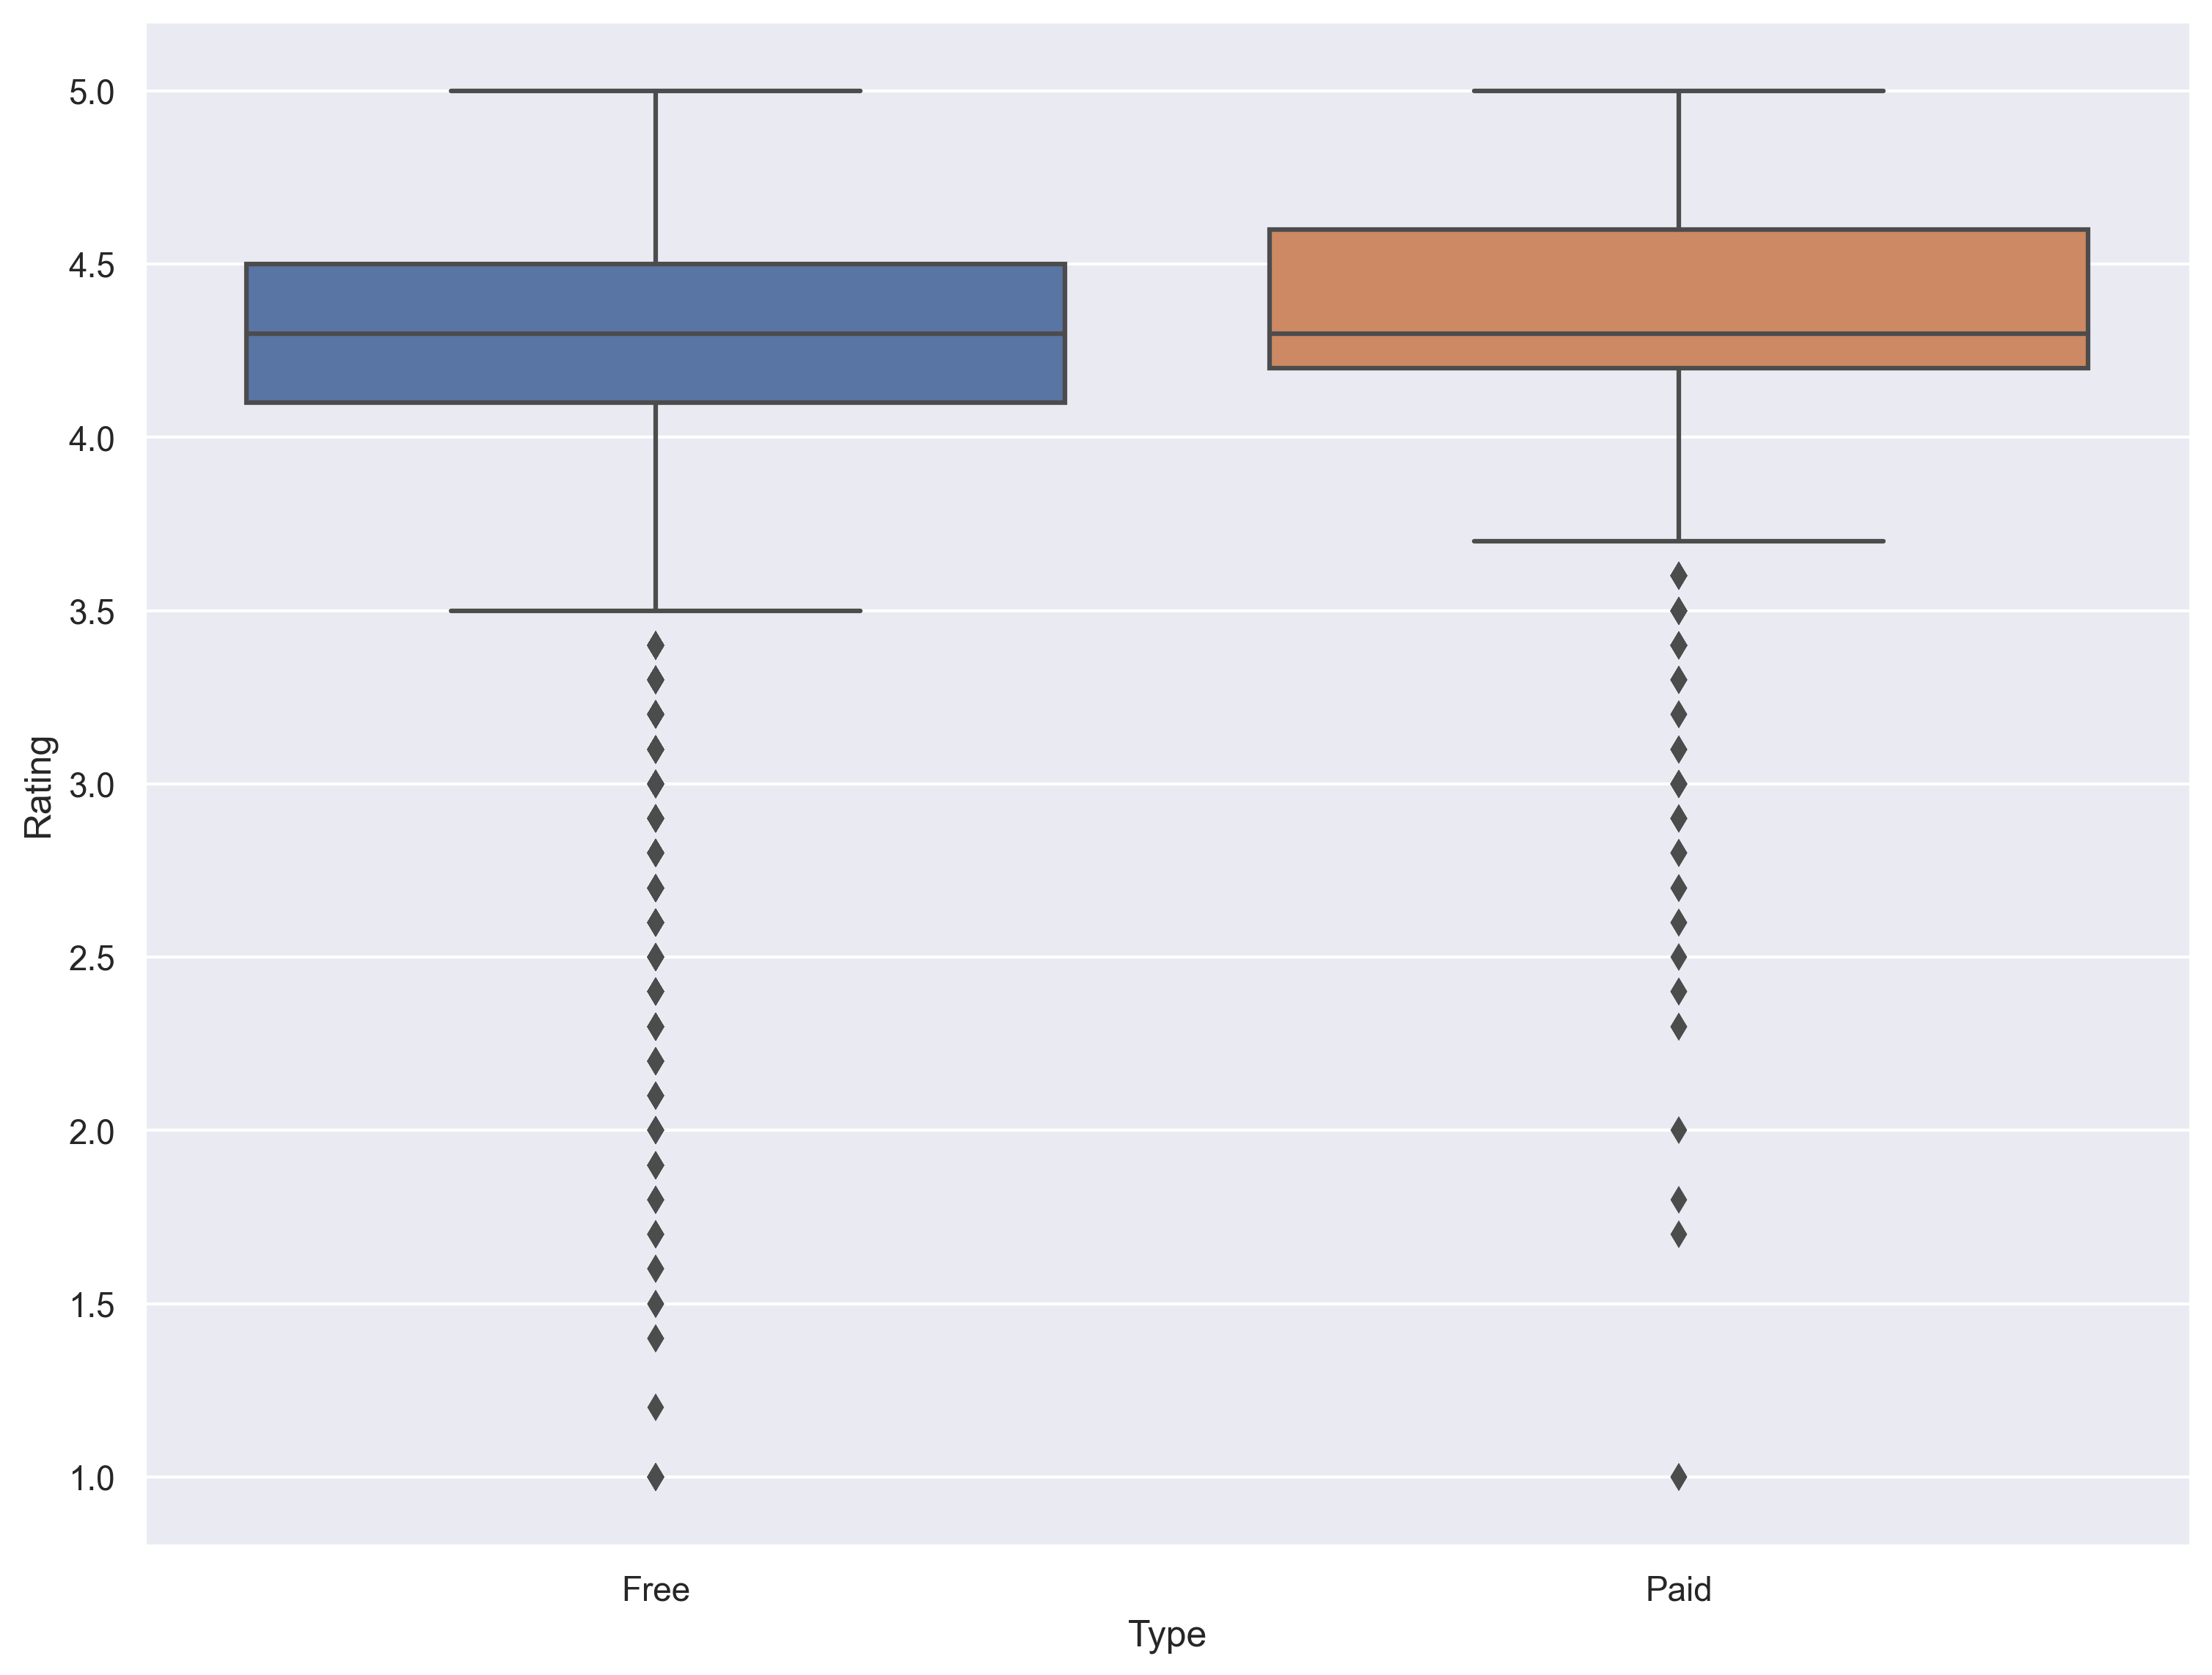

In [346]:
sbn.boxplot(x = "Type",y = "Rating",data=Dataset)

<Axes: xlabel='count', ylabel='Content_Rating'>

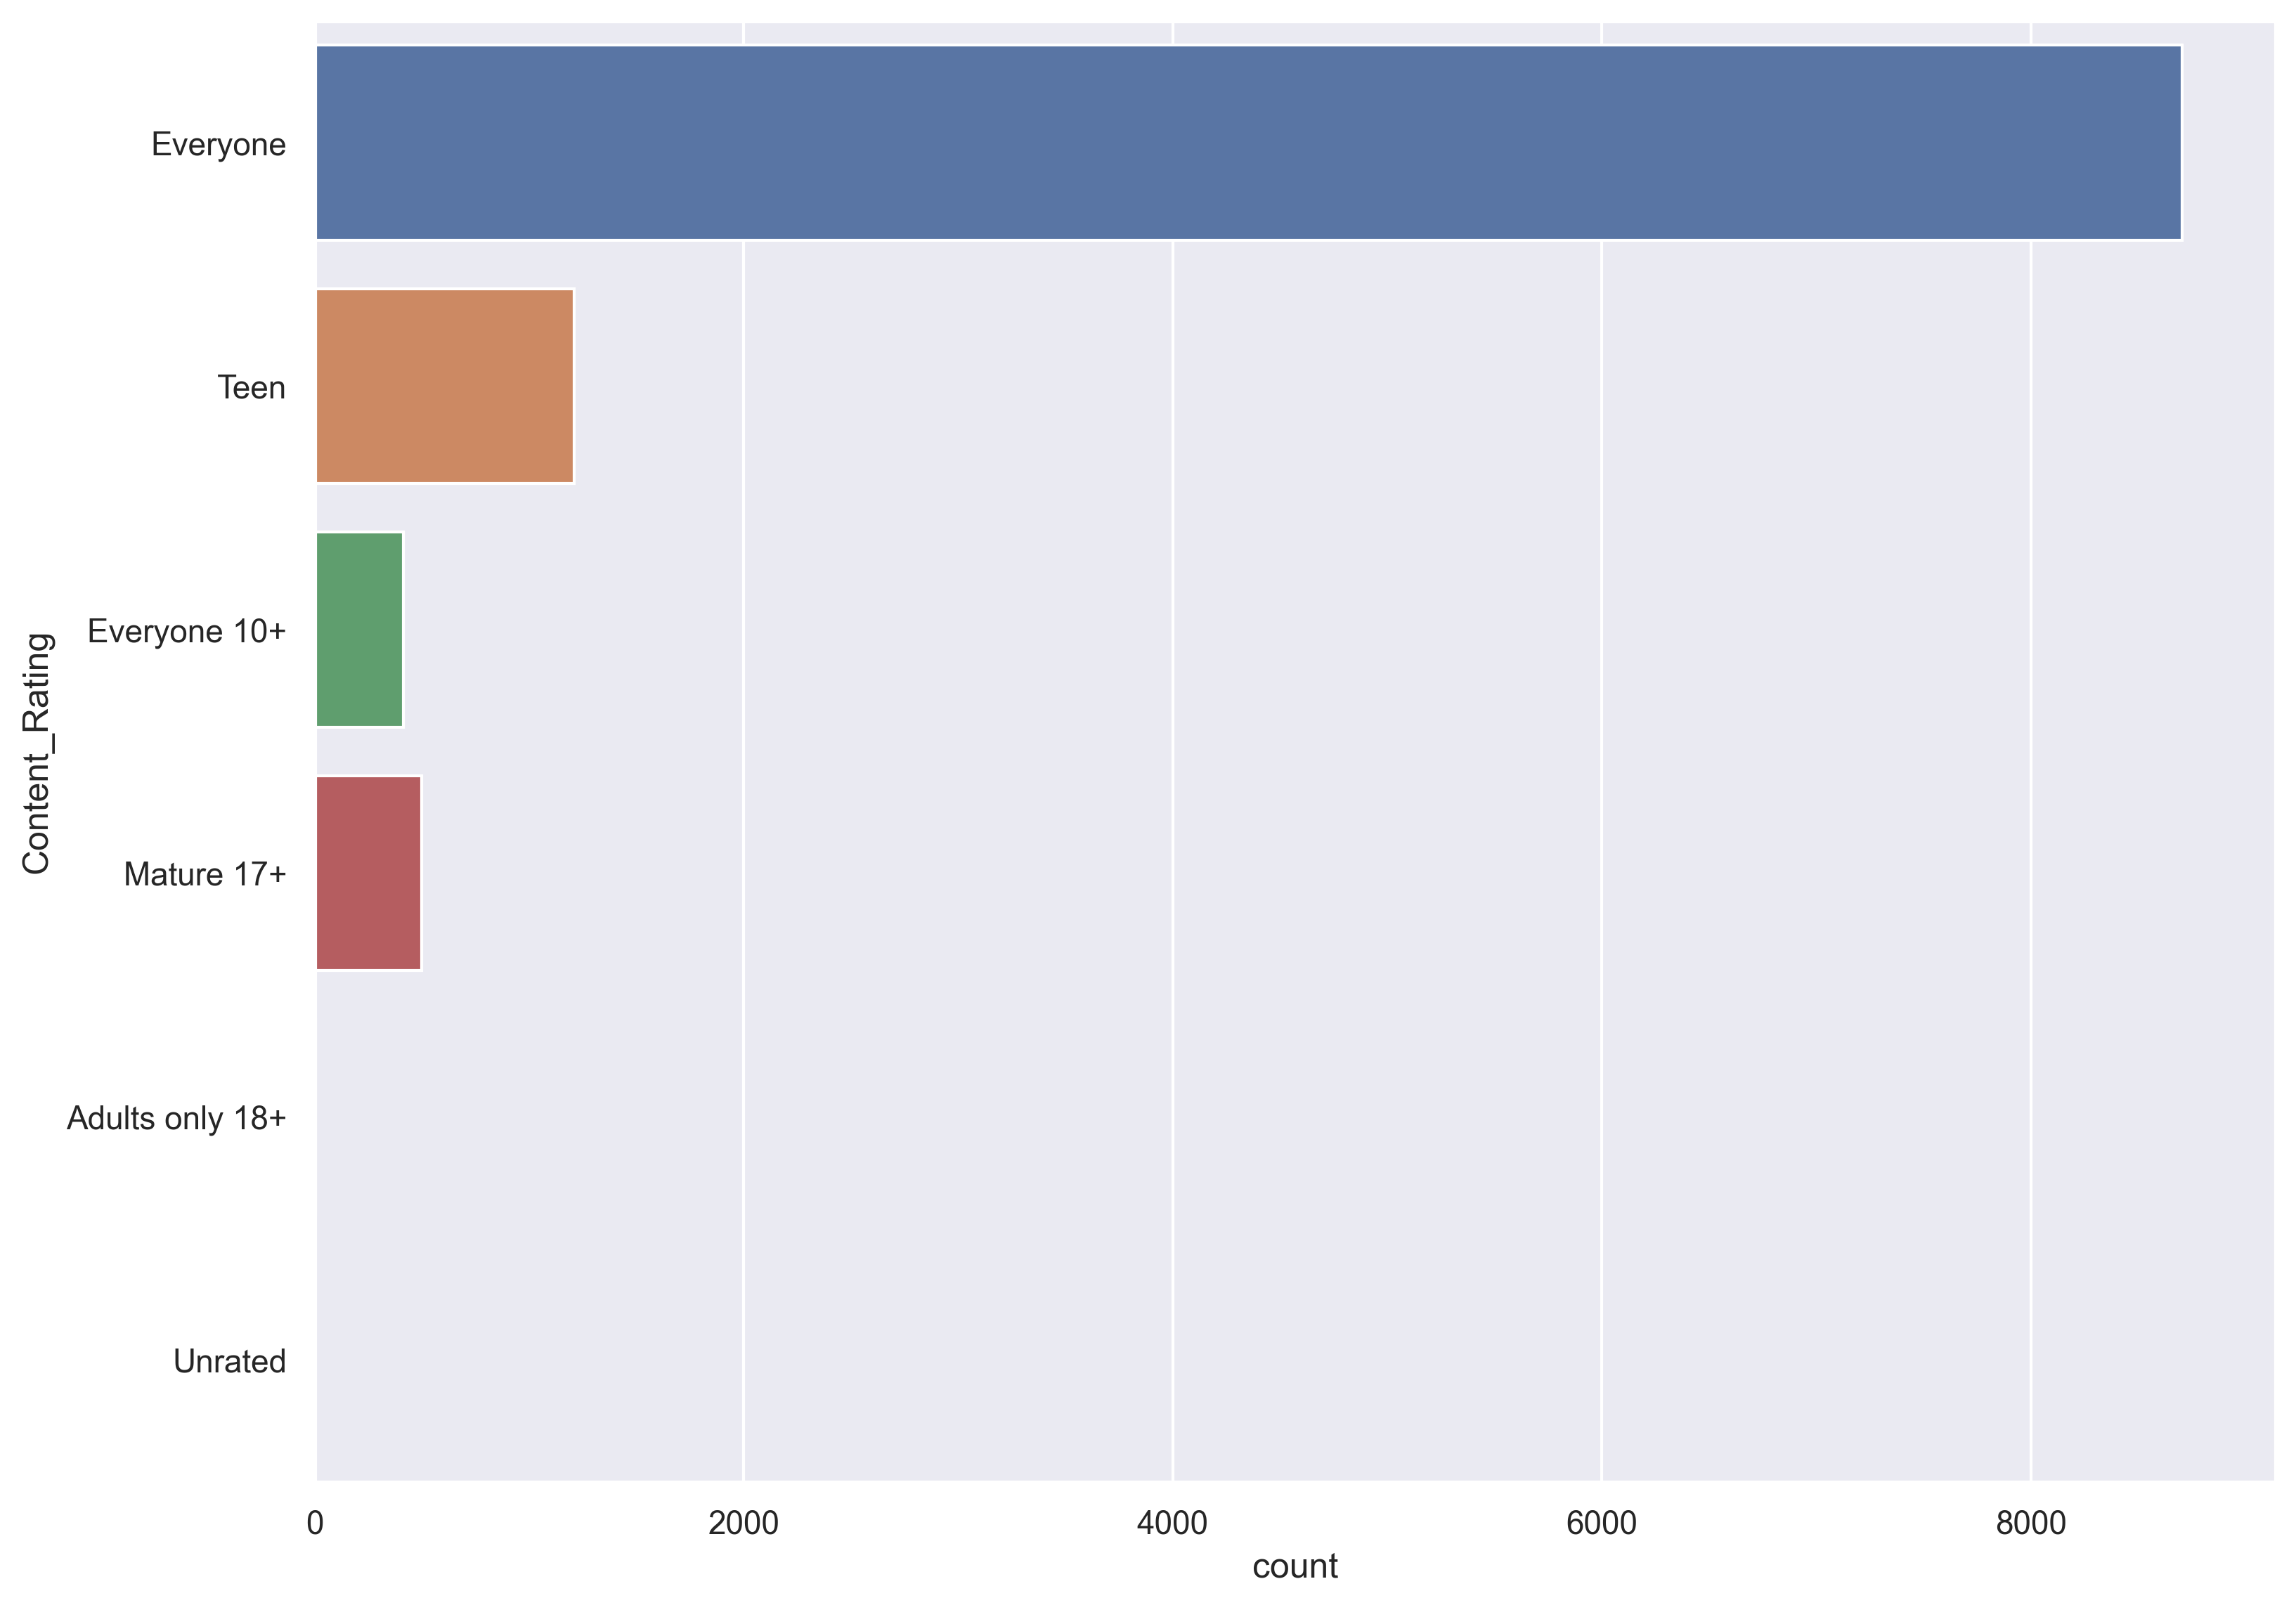

In [347]:
sbn.countplot(y = "Content_Rating",data=Dataset)

<Axes: xlabel='Content_Rating', ylabel='Rating'>

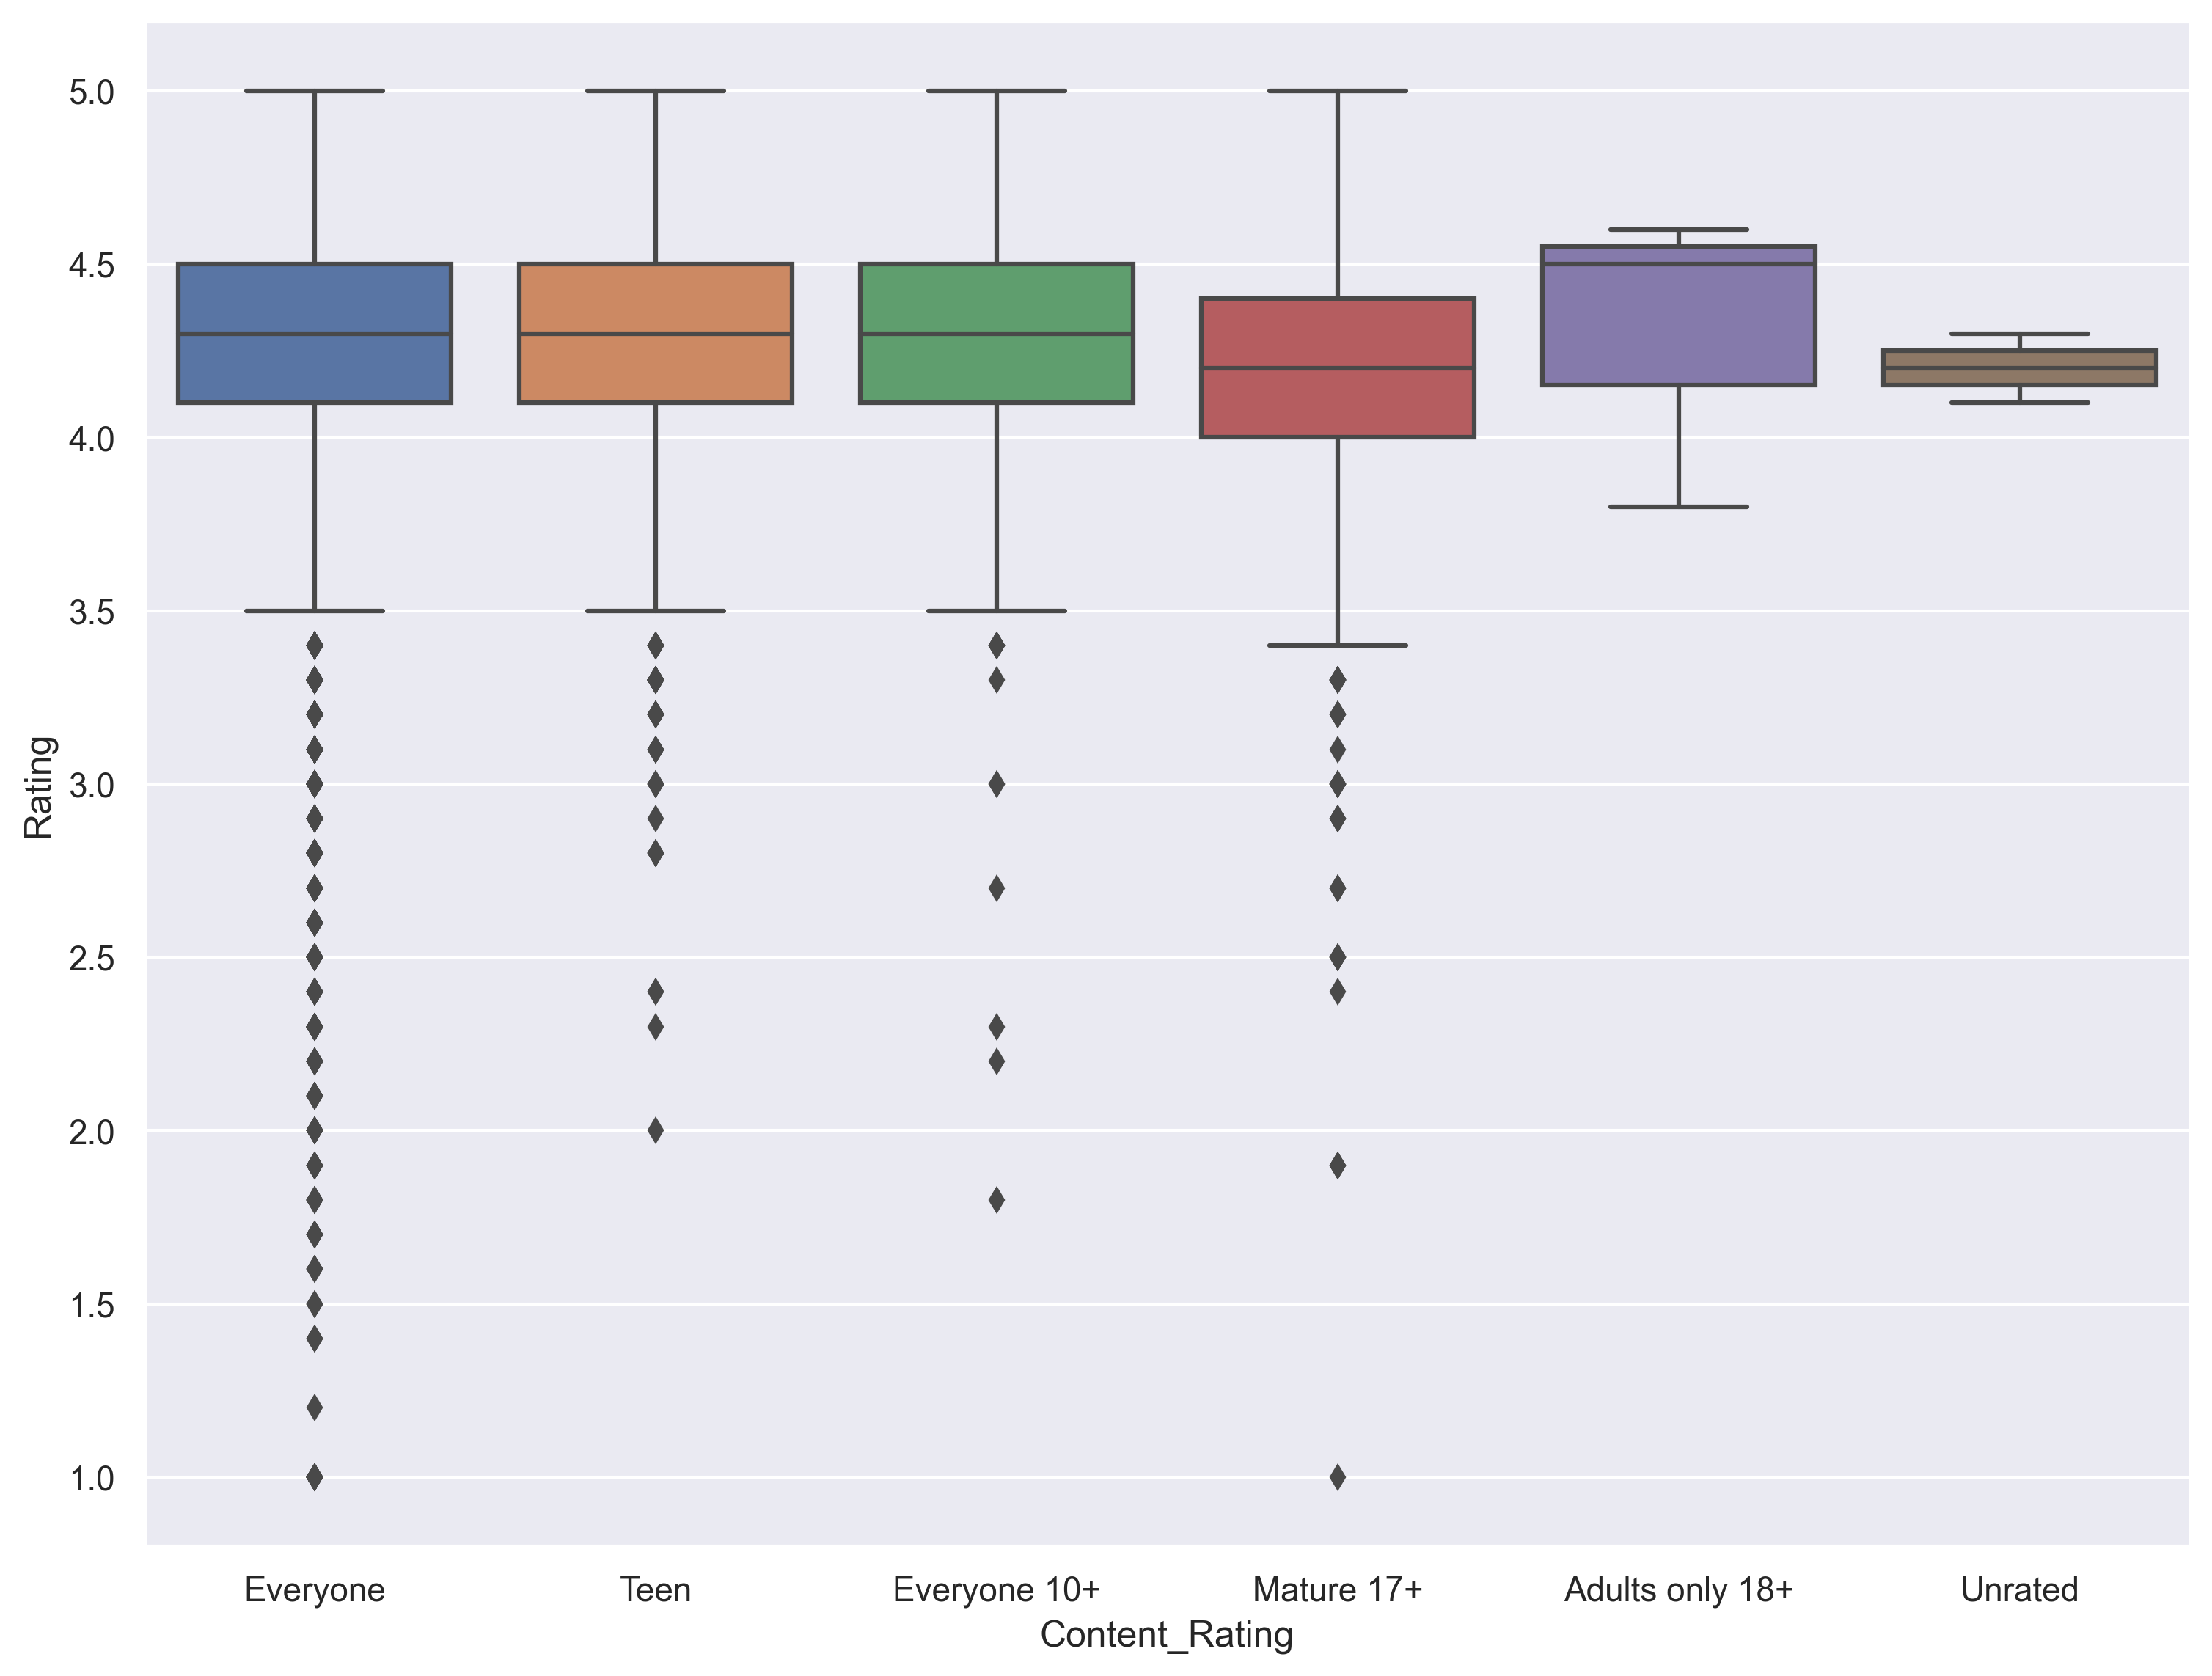

In [348]:
sbn.boxplot(x = "Content_Rating",y = "Rating",data=Dataset) # burada everyone'da aykırı değerin çok fazla olduğunu görürüz.

Text(0.5, 1.0, 'The number of categories')

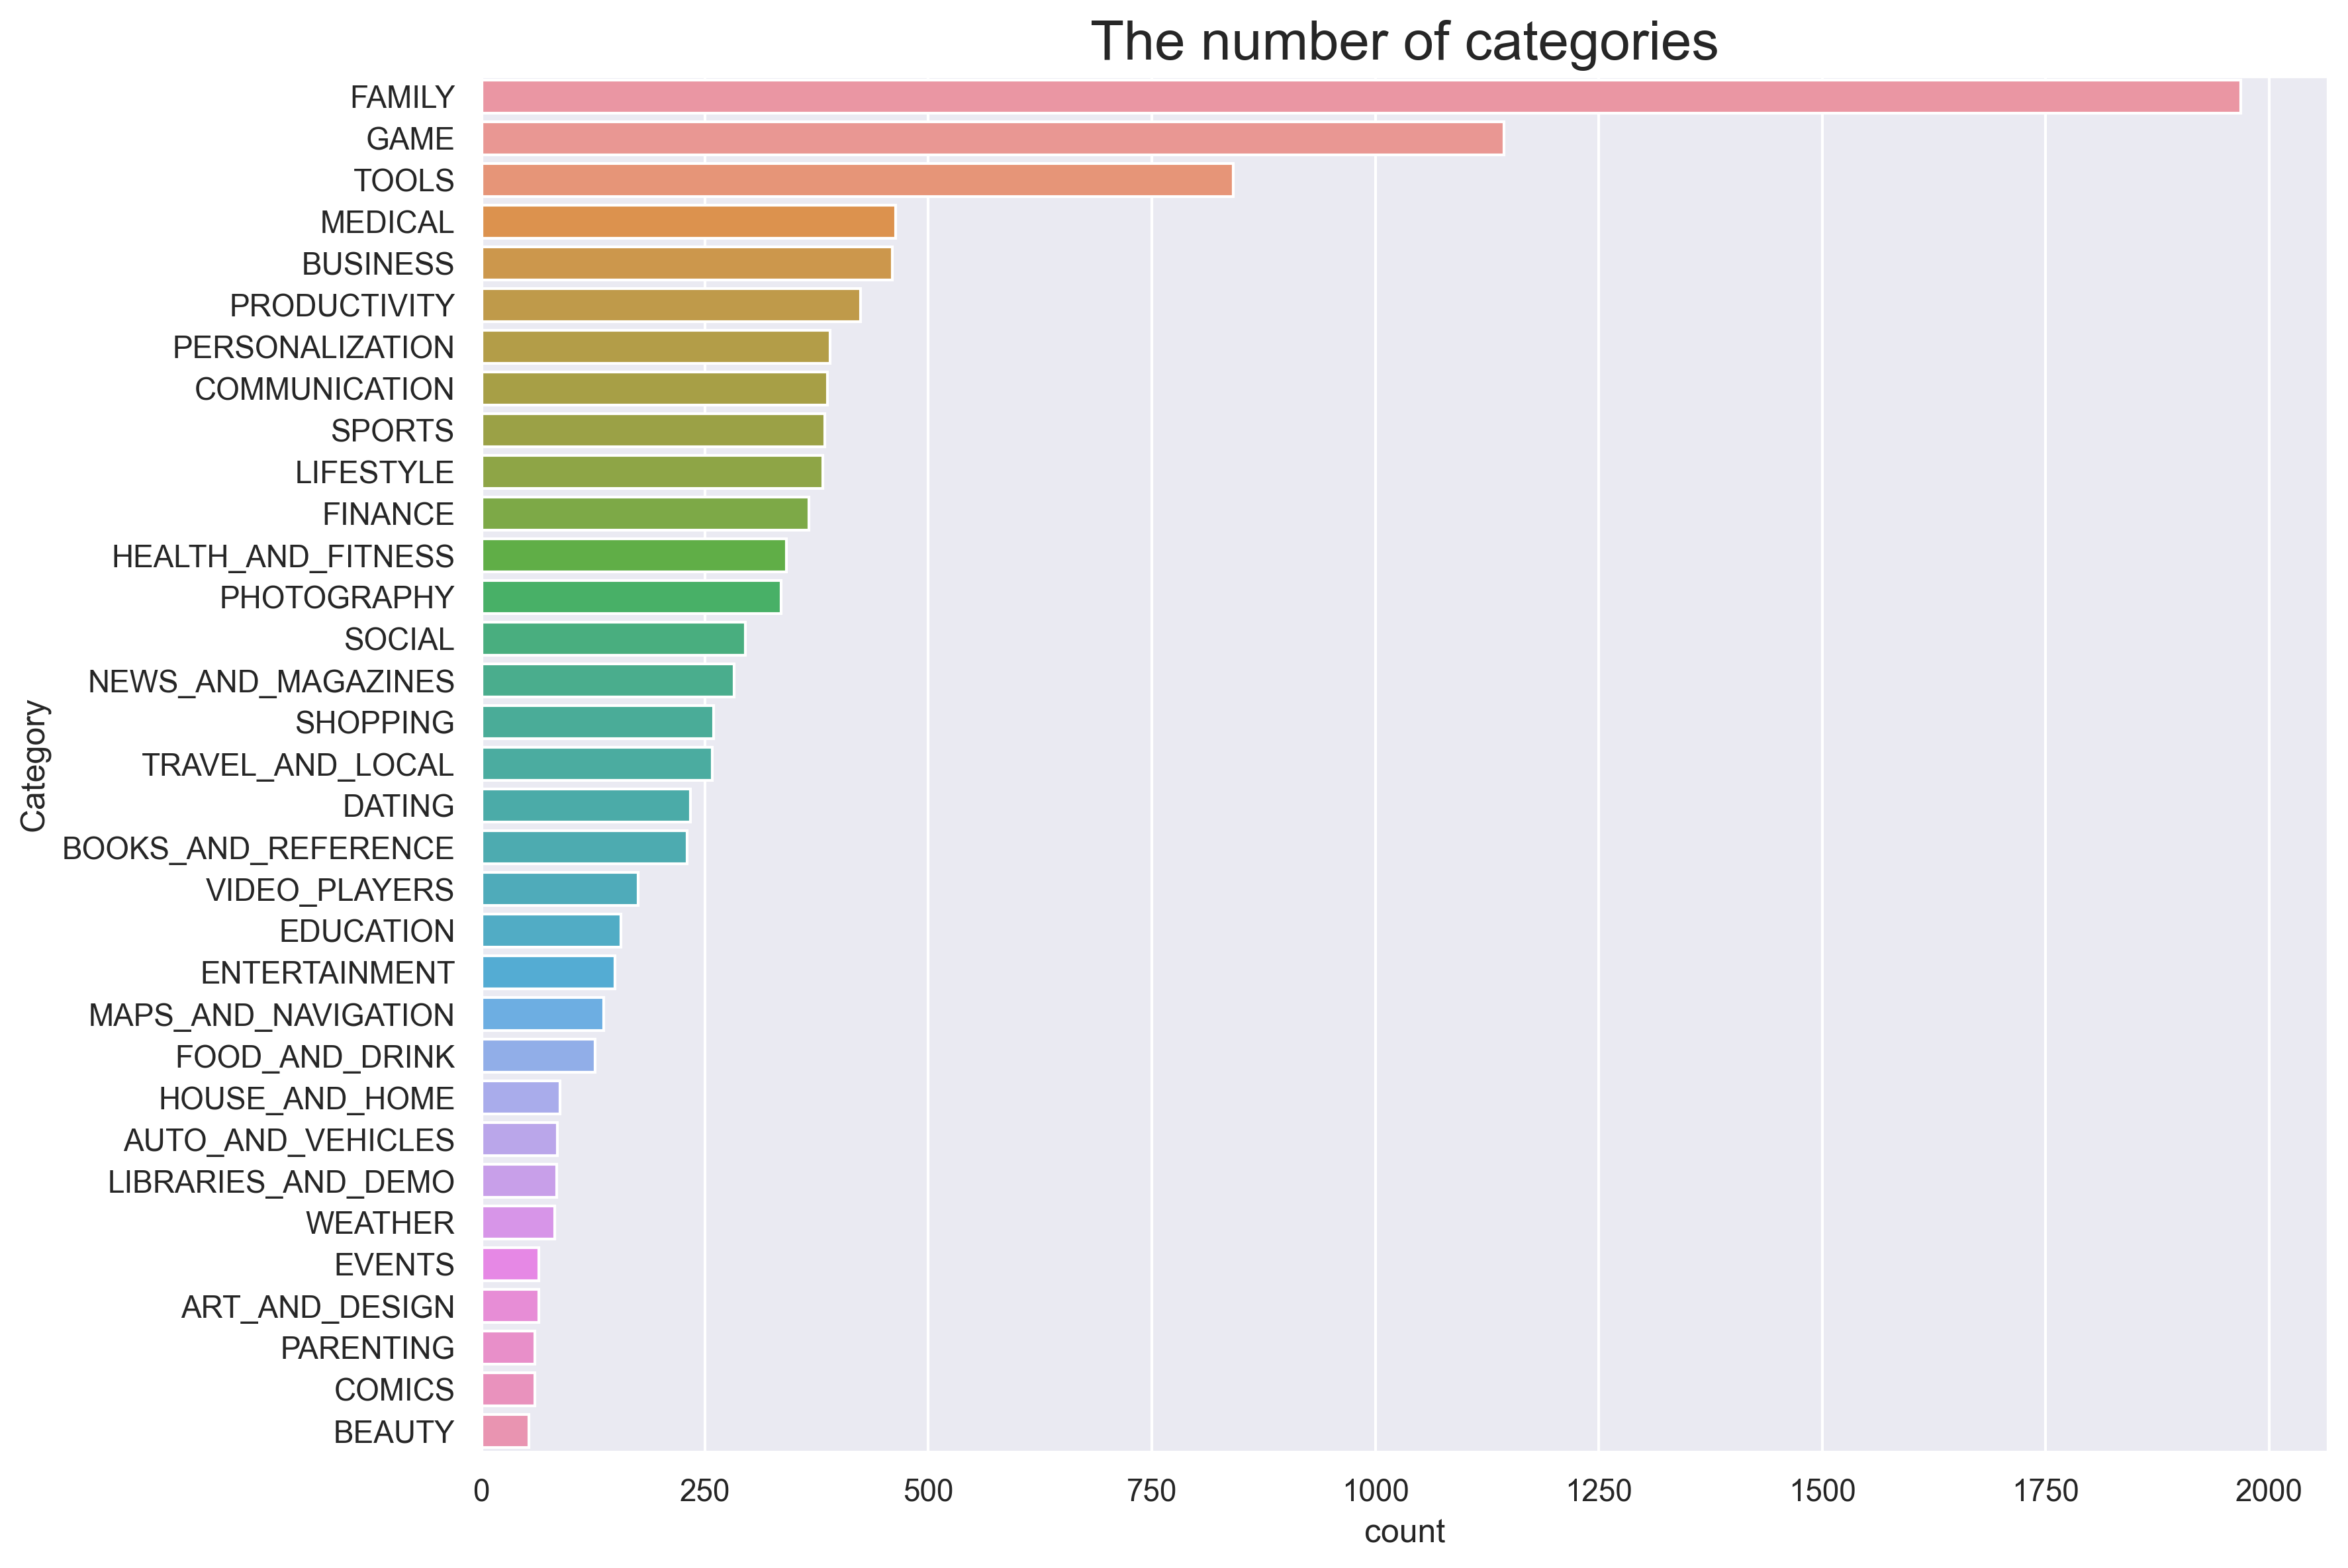

In [349]:
cat_num = Dataset.Category.value_counts()
sbn.barplot(x = cat_num,y = cat_num.index,data = Dataset)
plt.title("The number of categories",size = 20) # size ile başlık büyüttük.

<Axes: xlabel='Price', ylabel='Category'>

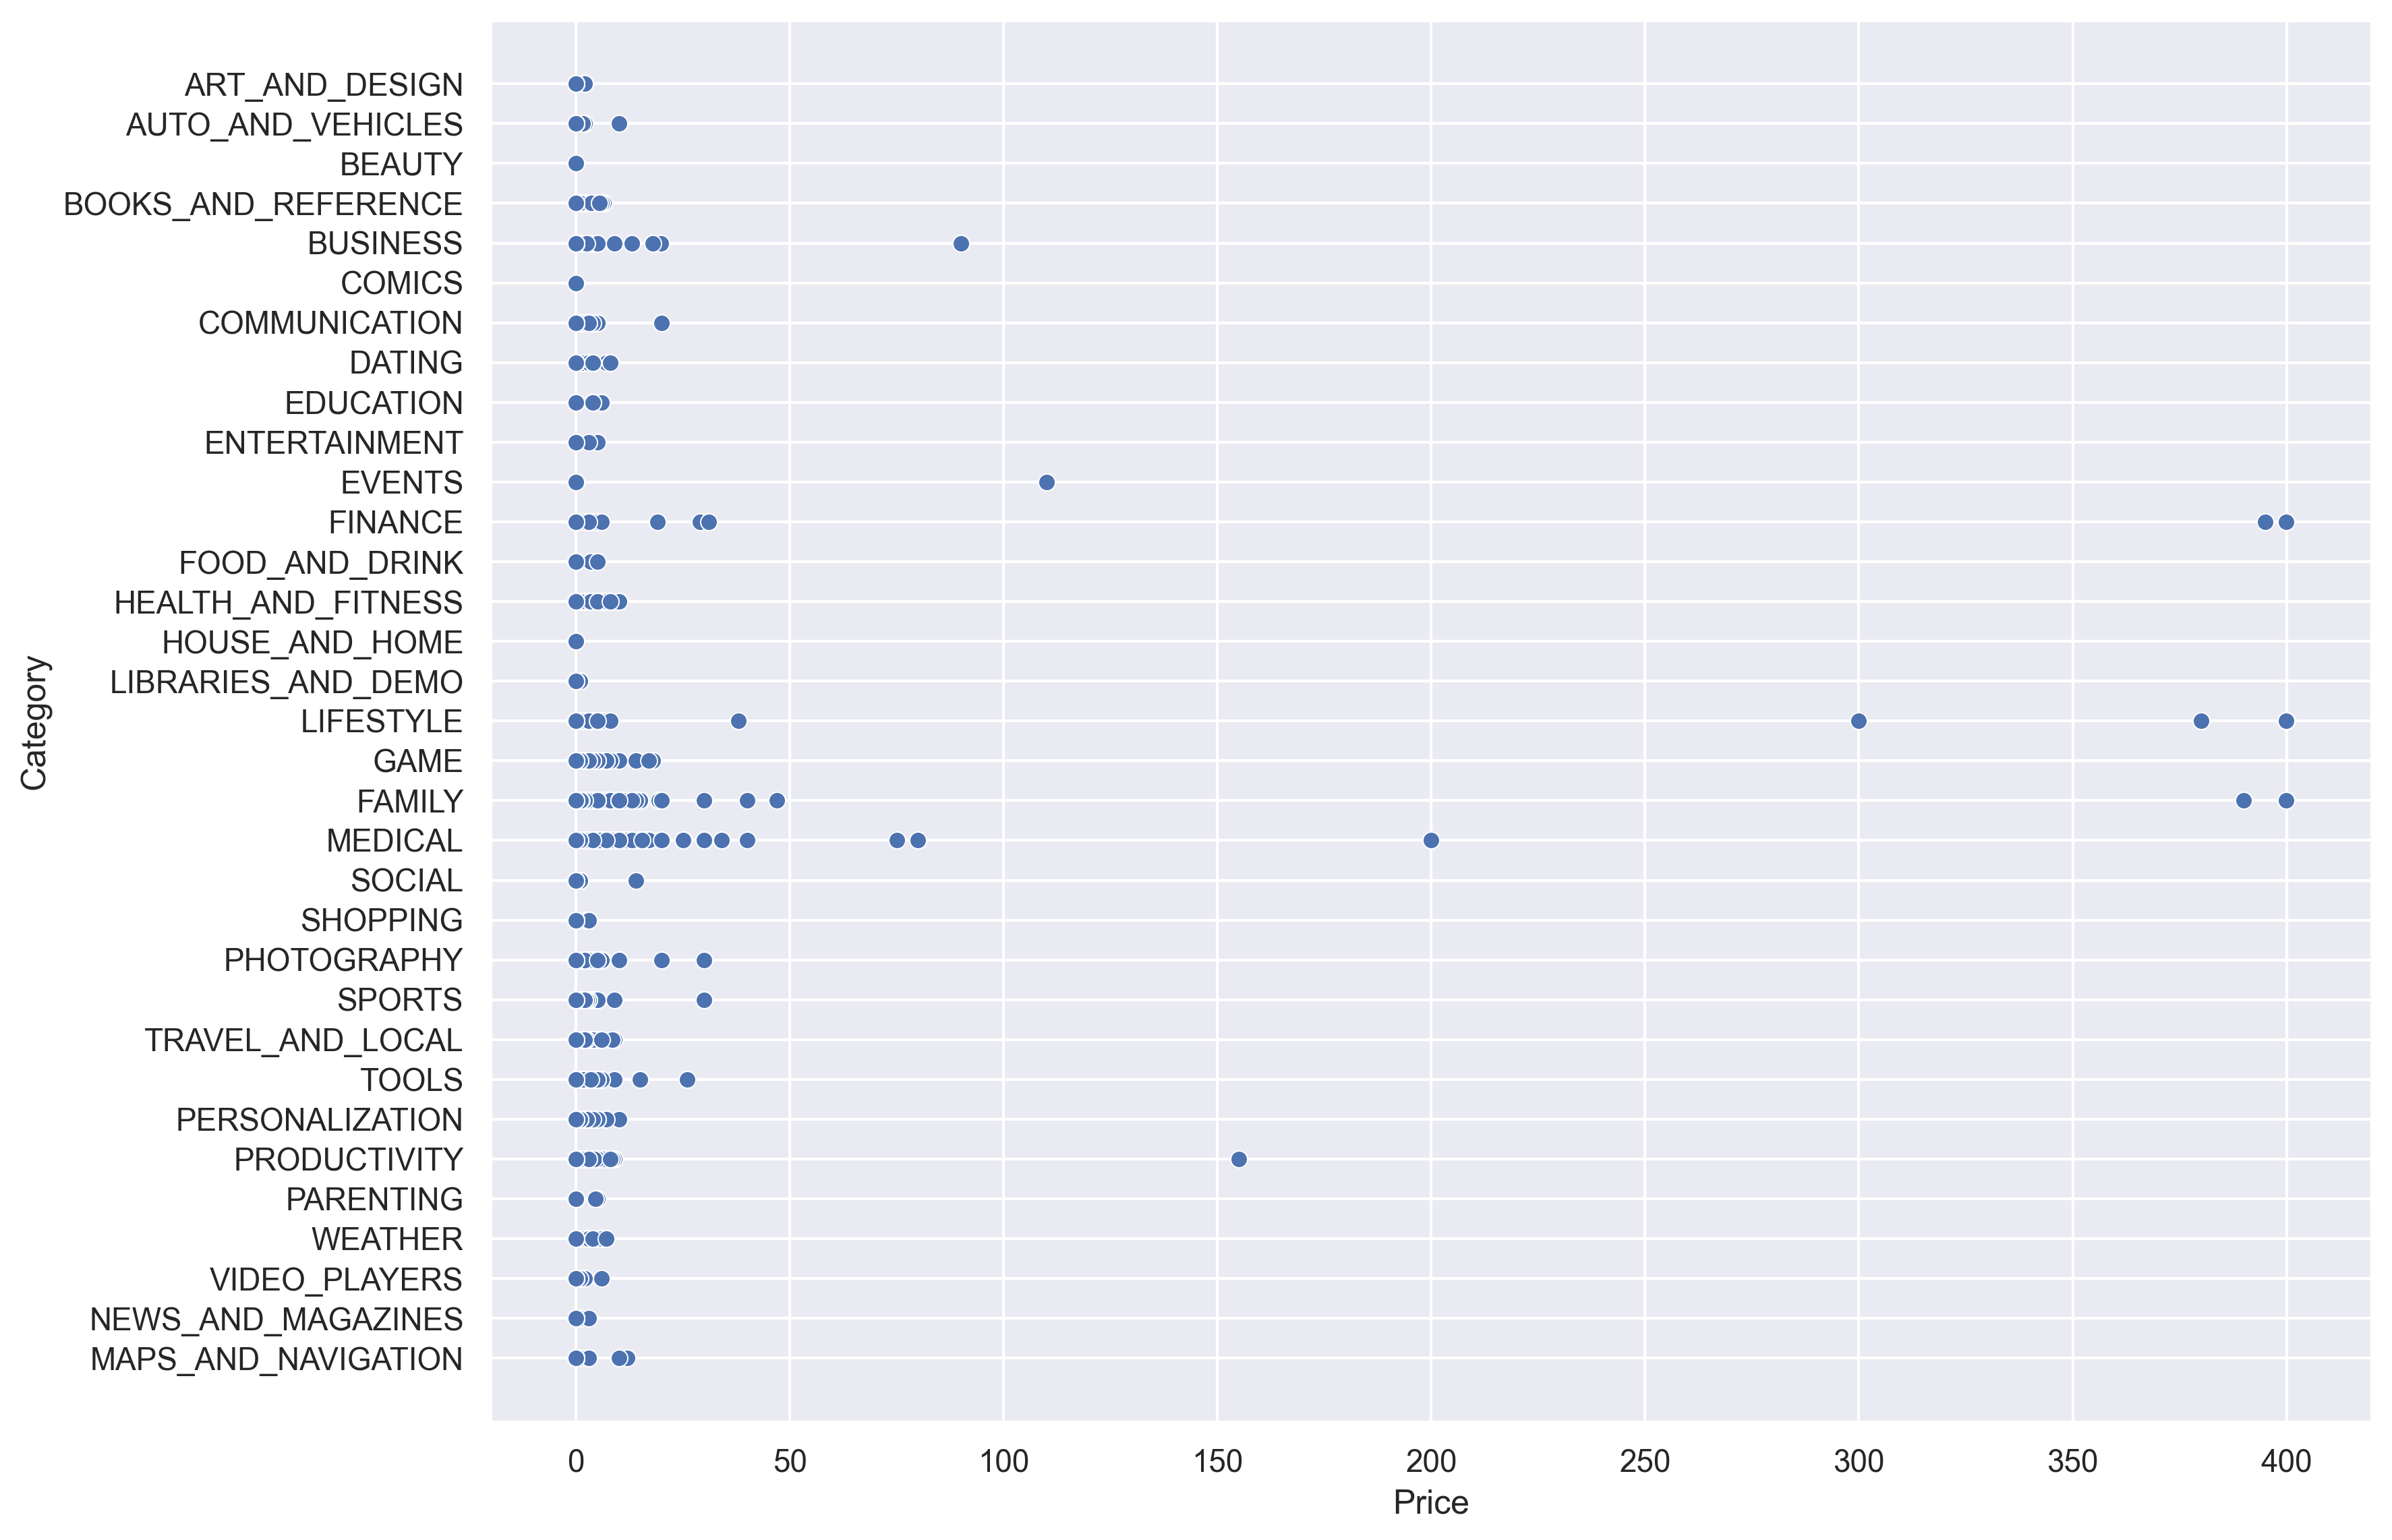

In [350]:
sbn.scatterplot(data=Dataset,y = "Category",x = "Price") # en fazla para verilen uygulamaları gördük.

In [352]:
Dataset.corr()

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'